# Abalone Rings (Age) Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
# set path to dataset
fpath = 'dataset/abalone.data'

In [3]:
df = pd.read_csv(fpath, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# data info is obtained from another folder
# map the column name to their dedicated column
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
print(df.shape)
print(df.describe())
print(df.dtypes)

(4177, 9)
            length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130

In [6]:
# look for missing values
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

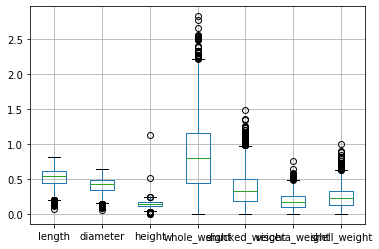

In [7]:
# look at skewness of all the features
df.drop('rings', axis=1).boxplot()

In [8]:
# define target and feature columns
target = 'rings'
features = list(df.columns)
features.remove(target)

In [9]:
# capping outliers
for f in features[1:]:
    upper_lim = df[f].quantile(0.75) + ((df[f].quantile(0.75) - df[f].quantile(0.25)) * 1.5)
    lower_lim = df[f].quantile(0.25) - ((df[f].quantile(0.75) - df[f].quantile(0.25)) * 1.5)
    
    df.loc[(df[f] > upper_lim), f] = upper_lim
    df.loc[(df[f] < lower_lim), f] = lower_lim

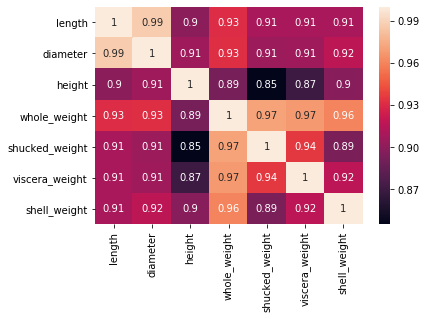

In [10]:
# look for correlation between features
sns.heatmap(df[features].corr(), annot=True)

## Based on the correlation matrix, these are concluded

### 1. It can be seen that diameter and length is highly correlated
### 2. Whole weight can represent the other weight features (shucked, viscera, shell)

In [11]:
# define X and y
y = df[target]
X = df[['length', 'height', 'whole_weight']]
X = pd.get_dummies(X)

In [12]:
# split dataset into train and test set
from sklearn.model_selection import train_test_split
test_size = 0.1
random_state = 1
np.random.seed(0)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1, test_size=0.1)

In [13]:
# scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

# define all the models
models = [
    {'name': 'RF', 'model': RandomForestRegressor(random_state=random_state)},
    {'name': 'DT', 'model': DecisionTreeRegressor(random_state=random_state)},
    {'name': 'SVR', 'model': SVR()},
    {'name': 'Linear', 'model': LinearRegression()},
    {'name': 'Ridge', 'model': Ridge(random_state=random_state)},
    {'name': 'LogReg', 'model': LogisticRegression()},
    {'name': 'XGBoost', 'model': XGBRegressor(random_state=random_state)},
]

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# loop through all the models and calculate the MAE and RMSE Score on test set
for m in models:
    model = m['model']
    model.fit(train_X, train_y)
    
    preds = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds)
    mse = mean_squared_error(test_y, preds)
    
    print(m['name'])
    print('MAE Score: ', mae)
    print('RMSE Score: ', np.sqrt(mse))
    print('')

RF
MAE Score:  1.5340430622009569
RMSE Score:  2.084307453282412

DT
MAE Score:  2.021531100478469
RMSE Score:  2.820380374088831

SVR
MAE Score:  1.5110525027513322
RMSE Score:  2.139220231158612

Linear
MAE Score:  1.54925587690964
RMSE Score:  2.0956486020872838

Ridge
MAE Score:  1.550322947039336
RMSE Score:  2.097858471240914



/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


LogReg
MAE Score:  1.624401913875598
RMSE Score:  2.4175395772676613

[23:49:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost
MAE Score:  1.5459938779402007
RMSE Score:  2.125280370997245



In [16]:
from sklearn.preprocessing import PolynomialFeatures

# polynomial model
model = LinearRegression()
poly = PolynomialFeatures(2)
X_train_transform = poly.fit_transform(train_X)
X_test_transform = poly.fit_transform(test_X)
model.fit(X_train_transform, train_y)

preds = model.predict(X_test_transform)

print('Polynomial Model')
print('MAE Score: ', mean_absolute_error(test_y, preds))
print('RMSE Score: ', np.sqrt(mean_squared_error(test_y, preds)))

Polynomial Model
MAE Score:  1.4655024320885326
RMSE Score:  1.9886015169424718


In [22]:
import keras.layers as layers
import keras
import tensorflow as tf
from keras.callbacks import EarlyStopping

from numpy.random import seed
seed(1)

# set early stopping to avoid overfitting
callbacks = [EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)]

# using Keras DNN for prediction
def build_model(lr=0.0001, epochs=500, batch_size=None):
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

    # define optimizer
    optimizer = keras.optimizers.Adam(lr=lr)

    # compile model
    model.compile(loss='mse', optimizer=optimizer)
    
    # train the model
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose=0, callbacks=callbacks)

    # summarize history for loss score
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # calculate the mae and rmse on test set
    preds = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds)
    rmse = np.sqrt(mean_squared_error(test_y, preds))
    
    return model, mae, rmse

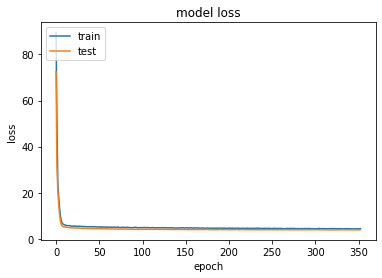

DNN Dense Model
MAE Score:  1.4608329985130346
RMSE Score:  1.9781261162330386


In [23]:
model, mae, rmse = build_model()

print('DNN Dense Model')
print('MAE Score: ', mae)
print('RMSE Score: ', rmse)